In [17]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import seaborn as sns
import re
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [76]:
#first read the annual list of movies, starting the the first year's set
movie_df = pd.read_csv("/Users/dhui/Dropbox/Metis/01_Github/nyc18_ds17/challenges/challenges_data/2013_movies.csv", index_col=0)

In [77]:
movie_df.head()

,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
Title,,,,,,
The Hunger Games: Catching Fire,130000000.00,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
Iron Man 3,200000000.00,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
Frozen,150000000.00,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
Despicable Me 2,76000000.00,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
Man of Steel,225000000.00,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [78]:
#Challenge 1
# Build a linear model that uses only a constant term (a column of ones) to predict a continuous 
# outcome (like domestic total gross). How can you interpret the results of this model? What does it 
# predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the 
# residuals distributed?

In [79]:
movie_df["one"] = 1

In [80]:
X = movie_df["one"]
y = movie_df["DomesticTotalGross"]

In [81]:
lr_model = LinearRegression()
lr_model.fit(X.to_frame(),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

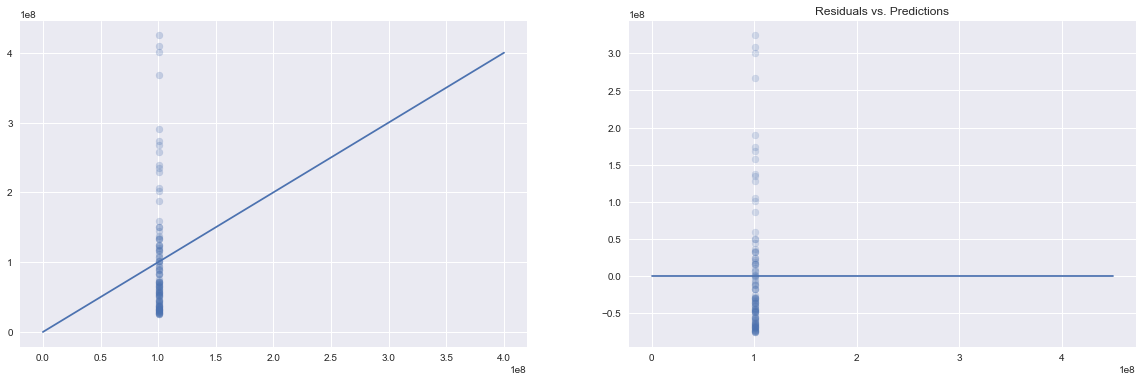

In [82]:
plt.figure(figsize=(20,6))

# Fitted vs. Actual
y_pred = lr_model.predict(X.to_frame())

plt.subplot(1, 2, 1)
plt.scatter(y_pred, y, alpha=0.25)
plt.plot([0, 400000000], [0, 400000000])

# Residuals
lin_reg_residuals = y - y_pred

plt.subplot(1, 2, 2)
plt.scatter(y_pred, lin_reg_residuals, alpha=.2)
plt.plot([0,450000000], [0, 0])

(array([47., 21., 15.,  3.,  3.,  4.,  3.,  0.,  1.,  3.]),
 array([-7.50286242e+07, -3.51186446e+07,  4.79133498e+06,  4.47013146e+07,
         8.46112942e+07,  1.24521274e+08,  1.64431253e+08,  2.04341233e+08,
         2.44251213e+08,  2.84161192e+08,  3.24071172e+08]),
 <a list of 10 Patch objects>)

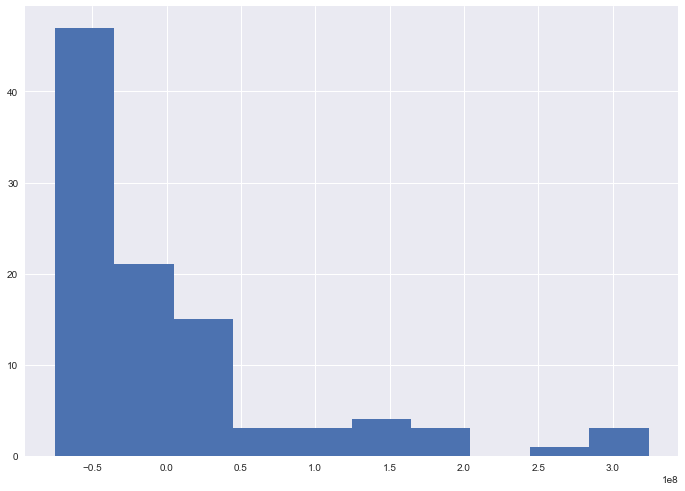

In [83]:
plt.hist(lin_reg_residuals)

In [84]:
# Challenge 2
# Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. 
# Also add plots of model prediction against your feature variable and residuals against feature 
# variable. How can you interpret what's happening in the model?

In [85]:
movie_df = movie_df.dropna()
X = movie_df[["Budget", "one"]]
y = movie_df["DomesticTotalGross"]

In [86]:
lr_model = LinearRegression()
lr_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

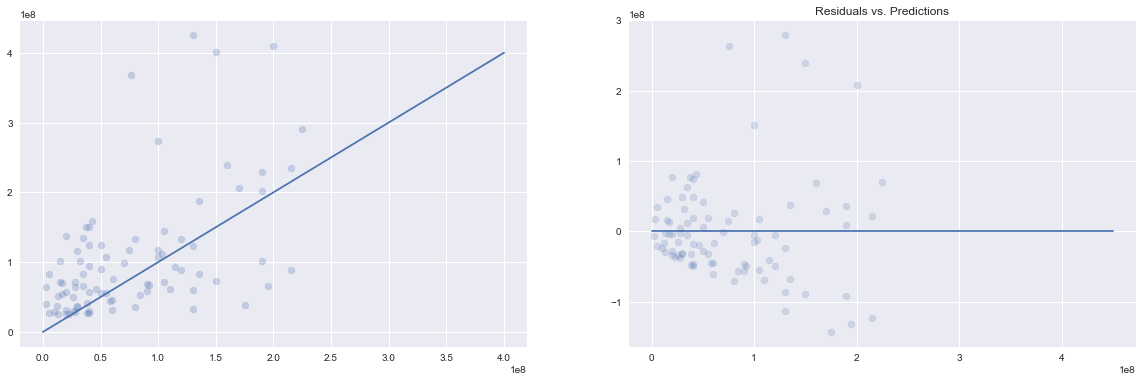

In [87]:
plt.figure(figsize=(20,6))

# Fitted vs. Actual
y_pred = lr_model.predict(X)

plt.subplot(1, 2, 1)
plt.scatter(X["Budget"], y, alpha=0.25)
plt.plot([0, 400000000], [0, 400000000])

# Residuals
lin_reg_residuals = y - y_pred

plt.subplot(1, 2, 2)
plt.scatter(X["Budget"], lin_reg_residuals, alpha=.2)
plt.plot([0,450000000], [0, 0])
plt.title("Residuals vs. Predictions");

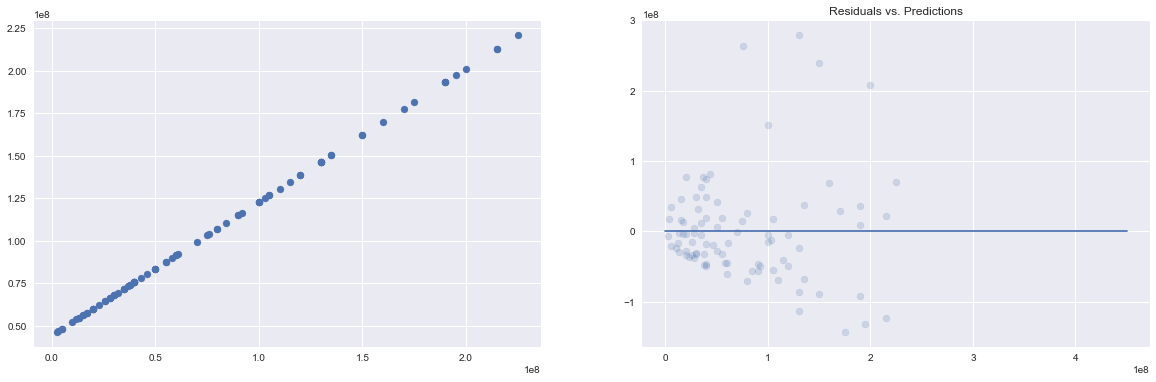

In [88]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
plt.scatter(X["Budget"], y_pred)

lin_reg_residuals = y - y_pred

plt.subplot(1, 2, 2)
plt.scatter(X["Budget"], lin_reg_residuals, alpha=.2)
plt.plot([0,450000000], [0, 0])
plt.title("Residuals vs. Predictions");

In [89]:
# Challenge 3

# Repeat the process of challenge 1, but add a categorical feature (like genre). You'll 
# have to convert a column of text into a number of numerical columns ("dummy variables"). 
# How can you interpret what's happening in the model?

In [90]:
movie_df = pd.merge(movie_df, pd.get_dummies(movie_df["Rating"]),left_index=True, right_index=True)

In [92]:
movie_df.head()

,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,one,PG,PG-13,R
Title,,,,,,,,,,
The Hunger Games: Catching Fire,130000000.00,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1,0,1,0
Iron Man 3,200000000.00,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1,0,1,0
Frozen,150000000.00,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1,1,0,0
Despicable Me 2,76000000.00,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1,1,0,0
Man of Steel,225000000.00,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1,0,1,0


In [96]:
X = movie_df[["PG", "PG-13", "R", "one", "Budget"]]
y = movie_df["DomesticTotalGross"]

In [97]:
lr_model = LinearRegression()
lr_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

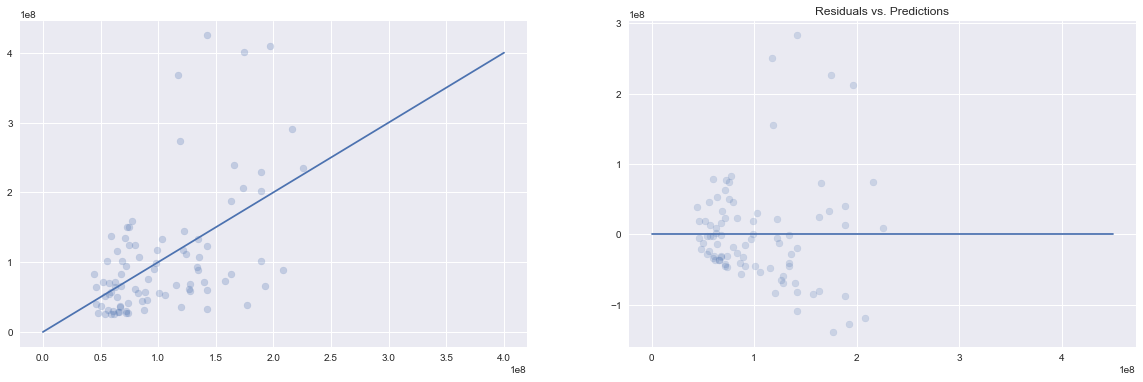

In [98]:
plt.figure(figsize=(20,6))

# Fitted vs. Actual
y_pred = lr_model.predict(X)

plt.subplot(1, 2, 1)
plt.scatter(y_pred, y, alpha=0.25)
plt.plot([0, 400000000], [0, 400000000])

# Residuals
lin_reg_residuals = y - y_pred

plt.subplot(1, 2, 2)
plt.scatter(y_pred, lin_reg_residuals, alpha=.2)
plt.plot([0,450000000], [0, 0])
plt.title("Residuals vs. Predictions");

In [ ]:
# Residuals Histogram
plt.hist(lin_reg_residuals)

In [ ]:
# Challenge 4

# Enhance your model further by adding more features and/or transforming existing features. 
# Think about how you build the model matrix and how to interpret what the model is doing.

In [100]:
X = movie_df[["PG", "PG-13", "R", "one", "Budget","Runtime"]]
y = movie_df["DomesticTotalGross"]

In [101]:
lr_model = LinearRegression()
lr_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

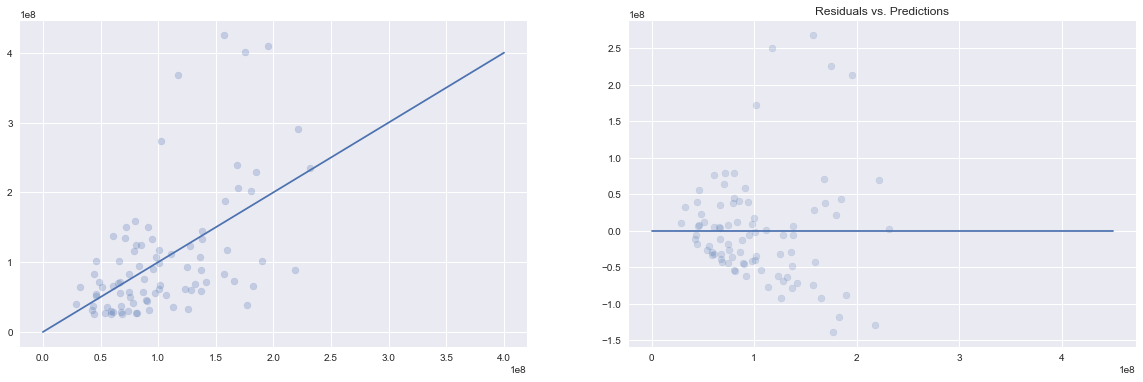

In [102]:
plt.figure(figsize=(20,6))

# Fitted vs. Actual
y_pred = lr_model.predict(X)

plt.subplot(1, 2, 1)
plt.scatter(y_pred, y, alpha=0.25)
plt.plot([0, 400000000], [0, 400000000])

# Residuals
lin_reg_residuals = y - y_pred

plt.subplot(1, 2, 2)
plt.scatter(y_pred, lin_reg_residuals, alpha=.2)
plt.plot([0,450000000], [0, 0])
plt.title("Residuals vs. Predictions");

In [ ]:
# Challenge 5

# Fitting and checking predictions on the exact same data set can be misleading. Divide your data into
# two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on
# the training set, check the predictions (by plotting versus actual values) in the test set.

In [103]:
#hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.25, random_state=20) #keep at 20 to be consistent

In [104]:
lr_model = LinearRegression()
lr_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

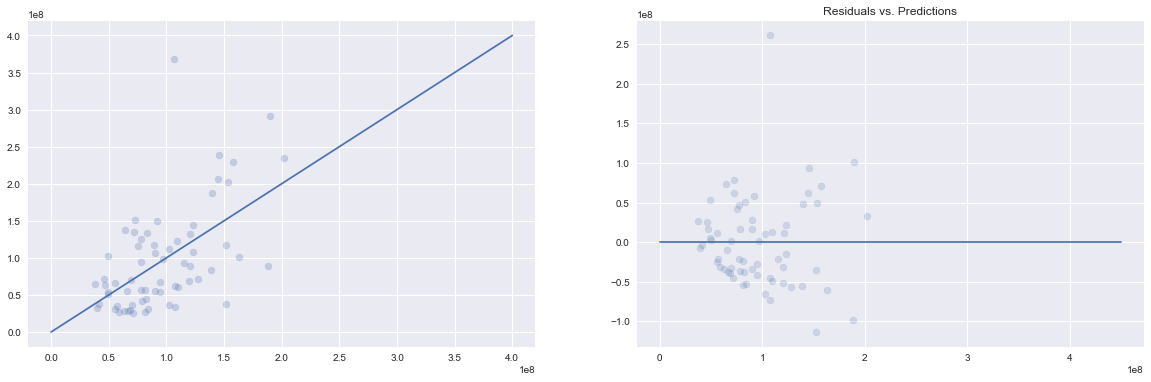

In [105]:
plt.figure(figsize=(20,6))

# Fitted vs. Actual
y_pred = lr_model.predict(X_test)

plt.subplot(1, 2, 1)
plt.scatter(y_pred, y, alpha=0.25)
plt.plot([0, 400000000], [0, 400000000])

# Residuals
lin_reg_residuals = y - y_pred

plt.subplot(1, 2, 2)
plt.scatter(y_pred, lin_reg_residuals, alpha=.2)
plt.plot([0,450000000], [0, 0])
plt.title("Residuals vs. Predictions");